In [3]:
%pylab inline
import pandas as pd
import altair as alt
import re
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


# Summary

Note:  
Data Quality (Excellent/Good/Bad)  
Up-to Date: Yes (Available until 2019) / No (Unavailable until 2019)

| Chart Number  | Data Access   |Up-to Date    |Data Quality  |Comments      |
| ------------- | ------------- |--------------|--------------|--------------|
| Chart-1        | Yes           |No            |Excellent     |Data Available up to 2017|
| Chart-2        | Yes           |No            |Excellent     |Data Available up to 2017|
| Chart-3        | yes           |yes           |Excellent     |Latest Data|
| Chart-4        | yes           |yes           |Excellent     |Latest Data|
| Chart-5        | yes           |No            |Good          |Had to manually fill in data;Latest version of data from 2015|
| Chart-6        | ------------- |--------------|--------------|--------------|
| Chart-7        | ------------- |--------------|--------------|--------------|
| Chart-8        | ------------- |--------------|--------------|--------------|
| Chart-9        | Yes           |No            |Excellent     |Data Available until 2017|
| Chart-10       | Yes           |No            |Excellent     |Data Available until 2017|
| Chart-11       | No            |No            |Bad           |Gun ownership Rate is not defined,Ownership data is  available as pdf|
| Chart-12       | ------------- |--------------|--------------|--------------|
| Chart-13       | ------------- |--------------|--------------|--------------|
| Chart-14       | ------------- |--------------|--------------|--------------|
| Chart-15       | Yes           |Yes           |Excellent       |Data Available until 2017|
| Chart-16       | Yes           |Yes           |Excellent            |Data Available until 2017|

In the below sections we will explain where (the data access/source), what (description) and how (cleansing process for the above charts) the data for the above chart is prepared. Each chart (or group of charts) will have heading section followed by where,how and what about the data.


## Chart-1

For the __Chart 1__ and __Chart 2__, we obtained the data from this [Guardian article](https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data). The data had to be manually downloaded as a .csv and read into the notebook. 

Get data here: https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

#### Read in the file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/guardian.csv', index_col = False)

It looks like there is a column measuring homicide by firearm rate per 100 thousand population. To recreate the Vox visualization, we will have to create a new column 'fire_hom_m' that measures the homicide by firearm rate per 1 mil population.

In [3]:
df['fire_hom_m'] = df['Homicide by firearm rate per 100,000 pop'] * 10

df2 = df.dropna().reset_index(drop = True)

Next, we will declare a list of only countries we want to visualize. Looks like the Vox chart only has a selected list of developed countries.

In [4]:
# List of selected developed countries
ls = ['Australia', 'New Zealand', 'Germany', 'Austria', 'Denmark',\
     'Netherlands', 'Sweden', 'Finland', 'Ireland', 'Canada', 'Luxembourg', 'Belgium',\
     'Switzerland', 'United States']

# We sort the table by fire_hom_m values in ascending order. We leave the index unchanged in case we want the original order.
adv = df2[df2['Country/Territory'].isin(ls)].reset_index(drop = True)
adv = adv.sort_values(by = 'fire_hom_m')

The dataframe is now ready to use for visualizing __Chart 1__

#### Visualization

We can replicate this chart by using Altair's Isotype Visualization, as outlined here: https://altair-viz.github.io/gallery/isotype.html

## Chart-2

For __Chart(s) 2__, we will have to calculate proportions of two things:
1. The proportion of _US population_ to the global population, and,
2. The proportion of _US civilian gun ownership_ to global civilian gun ownership

Based on the information already in hand, it seems we already have data to address (2) using the 'Average total all civilian firearms' field.

In [8]:
# Calculates the proportion of US gun ownership to the global gun ownership rate.
us_guns_prop = df[df['ISO code'] == 'US'].iloc[:,-2].sum() / df.iloc[:,-2].sum()
print('Americans own ' + str(round(us_guns_prop, 3) * 100) + '% of the world\'s guns.')

Americans own 41.9% of the world's guns.


This result is consistent with the percentage presented by Vox in the RHS chart.

To recreate the LHS chart, we have to be slightly crafty and utilize some assumptions. Witness the strength of street knowledge:

- We can safely assume that the world population today is somewhere around 7 billion people, while the current US population is about 320 million people.

We'll have to validate this using some [World Bank data](https://data.worldbank.org/indicator/sp.pop.totl) (by way of Wikipedia). This dataset is up to date as of 2017.

__Note: the .csv file needs to be manipulated in a text editor to remove the first 4 lines of header. pd.read.csv will throw an error if these lines are not removed.__

In [9]:
bank = pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/world_bank_pop_2017.csv', index_col = False, encoding = 'latin1')

In [25]:
def pop_prop(country, year):
    
    if year < 1960:
        print('Please enter 1960 or later.')
    elif year > 2017:
        print('Please enter 2017 or earlier.')
    else:
        # List of regex filters we don't want to be part of our global population calculation
        filt = '.*&.*|.*Income.*|.*North America.*|.*Asia.*|.*Europe.*|.*dividend.*|.*area.*|.*conflict.*|.*indebted.*|.*only.*|.*IDA.*|.*classified.*|.*developed.*|.*income.*|.*World.*|.*Sub-Saharan.*|.*states.*|.*members.*'

        # Calculates the global pop. and US pop. separetely, then prints the proportion as a string
        total_pop = bank[((bank['Country Name'].str.match(filt) - 1) * -1).astype('bool')][str(year)].sum()
        us_pop = bank[bank['Country Name'] == country][str(year)].sum()

        print(country + ' makes up ' + str(round(us_pop / total_pop, 4) * 100) + '% of the world population.')

In [26]:
pop_prop('United States', 2017)

United States makes up 4.33% of the world population.


It seems our calculations are overestimating the total world population, but we're within 10 basis points of Vox's calculations, so it's fine.

#### Visualization

Again, we will use Altair's Isotype Grid Visualization outlined here: https://altair-viz.github.io/gallery/isotype_grid.html

## Chart-3-There have been more than 1,600 mass shootings since Sandy Hook

The dataset is the same for __Chart-3__ and chart __Chart-4__.But will be manipulated according to the need of the visulaizations.__Chart-3__ uses an additional file.


+ Data Source(for Chart-3 and Chart-4)   :https://www.gunviolencearchive.org/reports
+ Data Source(Chart-3 only) :https://simplemaps.com/data/us-cities
+ Fetching Process     :Manual
+ Need Cleaning        :Yes


The Data used in **Chart-3** and **Chart-4** were collected individually for the years 2013 to 2019.
This data records the majority of reported mass shooting in the US.The information captured is a follows
+ Incident Date
+ State
+ City Or County
+ #Killed:The number of people killed in the incident
+ #Injured:The number of people injured in the incident
+ Operations: is N/A in the table , but on the website it redirects to article related to the incident.

The additional data used in __Chart-3__ gives us the co-ordnates for each city in the US.The data has many fields, but the ones we were interested in were:
+ city
+ state_name
+ lat:Captures the latitude for the city
+ lng:Captures the longitude for the city

**Processing the Data**
1. Importing the files.
2. Concatinating the files that captured data on Mass Shootings.from 2013-2019
3. Creating a Dummy variable for each row.
4. Grouping the data by "City or County"
5. Summing the dummy varibale introduced earlier .The sum gives the count of Mass Shootings done in the city so far.
6. Reading in the additional file captures the zipcode
7. Renaming the Columns so that it matches :"City or County" and "State"
8. Merging the The two datasets based on city name and state.
9. The Final Output is a Dataframe with State,City,Total Mass Shootings,latitude and Longitude of the city.


In [25]:
#Source:https://www.gunviolencearchive.org/reports
y2013=pd.read_csv("data/Mass shooting pic3 y2013.csv")
y2014=pd.read_csv("data/Mass shooting pic3 y2014.csv")
y2015=pd.read_csv("data/Mass shooting pic3 y2015.csv")
y2016=pd.read_csv("data/Mass shooting pic3 y2016.csv")
y2017=pd.read_csv("data/Mass shooting pic3 y2017.csv")
y2018=pd.read_csv("data/Mass shooting pic3 y2018.csv")
y2019=pd.read_csv("data/Mass shooting pic3 y2019.csv")

#Source:https://simplemaps.com/data/us-cities
latlong=pd.read_csv("data/uscitiesv1.5.csv")

In [26]:
df=pd.concat([y2013, y2014,y2015,y2016,y2017,y2018,y2019])
df["happening_dummy"]=1
df1=df.groupby(["City Or County"])["happening_dummy"].sum()
df1=df1.to_frame()
df1 = df1.rename(columns={'happening_dummy':'Total'})
df1["City Or County"]=df1.index

In [27]:
df2=df[["City Or County","State"]]
df2=df2.drop_duplicates()


In [28]:
df3=df1.merge(df2)
df3=df3.sort_values(["State","City Or County"])
df3 = df3.reindex_axis(["State","City Or County","Total"], axis=1)

C:\Users\KushallYash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'City Or County' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\Users\KushallYash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
latlong1=latlong[["city","lat","lng","state_name"]]
latlong1=latlong1.rename(columns={'city':'City Or County','state_name':'State'})


In [30]:
df4=pd.merge(df3, latlong1, on=['State', 'City Or County']).drop_duplicates()

Chart_3=df4

In [ ]:
Chart_3

## Chart-4- On average, there is around one mass shooting for each day in America

The Description of the dataset has been discussed in the previous markdown

**Processing the Data**

1. Importing the files.
2. Data Cleaning
3. Creating a dummy variable for each row ,equal to 1
4. Converting the Data from String to datetime64
5. Grouping by the date and summing the the dummy variable, this addition describes the number of mass shootings occured within a day
6. converting the dataset from series to Dataframe
7. filling the Missing dates and filling in Total Shootings = 0 for the missing columns
8. Returning the processed data set

Repeat the steps for each dataset(2013-2019) by passing the raw data to function-__shooting_function()__

In [22]:
def shooting_function(df):
    df=df.drop(["Operations"],axis=1)
#df.index = df.index.astype(np.datetime64)
    df["happening"]=1
    df["Incident Date"] = df["Incident Date"].astype(np.datetime64)
    df1=df.groupby("Incident Date").happening.sum()
    df1=df1.to_frame()
    df1 = df1.rename(columns={'happening':'Total'})
    df1=df1.asfreq('1D',fill_value=0)
    return df1

In [23]:
df_2013=shooting_function(y2013)
df_2014=shooting_function(y2014)
df_2015=shooting_function(y2015)
df_2016=shooting_function(y2016)
df_2017=shooting_function(y2017)
df_2018=shooting_function(y2018)
df_2019=shooting_function(y2019)

## Chart-5 - States with more guns have more gun deaths


+ Data Source(Firearms death rate per 100000)   :https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
+ Data Source(Gun Ownership by State %) :https://www.cbsnews.com/pictures/gun-ownership-rates-by-state/
+ Fetching Process     :Manual
+ Need Cleaning        :Yes

The Dataset used in **Chart-5** belongs to the year 2015.

Note: 
+ the Dataset that records Firearms death rate per 100000 was cleaned manually on excel .Reason being that it gives an error on reading the raw file as it is.
+ the Dataset that records gun ownership by state was made manually on excel by referring the article[https://www.cbsnews.com/pictures/gun-ownership-rates-by-state/]


The Datasets contains the fields:

__Firearms death rate per 100000 :__
+ Location
+ Firearms Death Rate per 100,000

__Gun Ownership by State % :__
+ Location
+ Gun Ownership(percentage)




**Processing the Data**
1. Importing the files.
2. Merging the datsets with Location as the key.



In [20]:
df=pd.read_csv("data/2015 deaths.csv")
df2=pd.read_csv("data/Gun ownership by 2015.csv")

In [14]:
df3=df.merge(df2)

In [15]:
Chart_5=df3

In [ ]:
Chart_5

## Chart-6 - It’s not just the US: Developed countries with more guns also have more gun deaths

There are 9 columns in this dataset:
    --Country/territory
    --ISO code
    --Source
    --% of homicides by firearm
    --Number of homicides by firearm
    --Homicide by firearm rate per 100,000 pop
    --Rank by rate of ownership
    --Average firearms per 100 people
    --Average total all civilian firearms
    
we pick the country, Number of homicides by firearm, Average firearms per 100 people three columns to visualize the topic.

Data Source: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list

In [8]:
#read in file
gun6 = pd.read_csv('World firearms murders and ownership - Sheet 1.csv', sep = '\t')

#cleaning the data
gun6.columns = ['Description']
gun6 = gun6.Description.str.split(',', expand = True)

#pick columns 0,5,7 reset columns names
gun6 = gun6.iloc[:,[0,5,7]]
gun6.columns = ['country', 'Number of homicides by firearm', 'Average firearms per 100 people']

#drop na values
gun6 = gun6.replace(r'', np.NaN)
gun6 = gun6.dropna()

gun6

,country,Number of homicides by firearm,Average firearms per 100 people
0,Albania,1.76,8.6
1,Algeria,0.06,7.6
4,Argentina,3.02,10.2
5,Armenia,0.29,12.5
6,Australia,0.14,15
7,Austria,0.22,30.4
8,Azerbaijan,0.12,3.5
9,Bahamas,15.37,5.3
10,Bahrain,0,24.8
11,Bangladesh,1.12,0.5


## Chart-7


Data Scource: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list

## Chart-8 - States with tighter gun control laws have fewer gun-related deaths

This are two simple datasets can be used in this chart. 

First one has two columns, one for 50 States, the other is firearms death rate per 100,000. 
Data Source: https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D


In [4]:
#read in the file
gun81 = pd.read_table('chart81.csv')

#eliminate other irrelevent rows, only keep 50 States information
gun81 = gun81[3:54].reset_index().drop(columns = 'index')

#cleaning the dataset into two columns
gun81.columns = ['Description']
gun81 = gun81.Description.str.split(',', expand = True)
gun81.columns = ['State', 'Firearms Death Rate per 100,000']

#change the data type into numerical
gun81['Firearms Death Rate per 100,000'] = gun81['Firearms Death Rate per 100,000'].str.strip('""').astype(float)


/Users/zhangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


The second dataset has 4 columns: State, children access prevention firmarms law, safe storage or gun lock requirement, assault weapon ban. We only need the first two columns, one for 50 States, the other is if the State has firmarm law or not. 

Data Source: https://www.kff.org/other/state-indicator/firearms-and-children-legislation/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D


In [5]:
#read in the file
gun82 = pd.read_table('chart82.csv')

#cleaning the dataset, keep 50 States and two columns
gun82 = gun82[3:54].reset_index().drop(columns = 'index')
gun82.columns = ['Description']
gun82 = gun82.Description.str.split(',', expand = True)
gun82 = gun82.loc[:,0:1]
gun82.columns = ['State', 'firearm law']

#If the State has firearm law, it marks as 1, if not, it marks as 0.
gun82['firearm law'] = gun82['firearm law'].apply(lambda x: 1 if x == '"Yes"' else 0)


/Users/zhangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


merge two table into one

In [6]:
gun8 = pd.merge(gun81, gun82, on = 'State')

In [7]:
gun8

,State,"Firearms Death Rate per 100,000",firearm law
0,Alabama,22.9,0
1,Alaska,24.5,0
2,Arizona,15.8,0
3,Arkansas,20.3,0
4,California,7.9,1
5,Colorado,13.4,1
6,Connecticut,5.1,1
7,Delaware,11.7,1
8,District of Columbia,13.1,1
9,Florida,12.4,1


## Chart-9 - Still, gun homicides (like all homicides) have declined over the past couple decades.
## Chart-10 - Most gun deaths are suicides.

For **Chart#9** and **Chart#10** the data source is same. Fetching and cleaning process are same. Hence they are clubbed together.

+ Data Source          :https://webappa.cdc.gov/sasweb/ncipc/mortrate.html
+ Fetching Process     :Manual
+ Need Cleaning        :Yes

**Fetching Process**
The data is downloaded from https://webappa.cdc.gov/sasweb/ncipc/mortrate.html.
For **Chart#9** we need to collect data in two attempts. One for year range 1999 to 2017 and 1981 to 1998
and for **Chart#10** we can run the query one year 1999 to 2017. We repeat the steps below for every year range or 'Intent or Manner of injury' either as Homicide or Suicide.

1. In the above website given , choose the first option in year range as '1999 to 2017 (ICD-10), National and Regional' and choose Intent or Manner of injury as 'Homicide' as shown in [Picture-1](https://github.com/srivasud/Group7/blob/master/images/Q9-10-CDCImage-1.png)
2. Choose 'Cause or mechanism of the injury' as 'Firearm' as shown in [Picture-2](https://github.com/srivasud/Group7/blob/master/images/Q9-10-CDCImage-2.png)
3. Choose select 'Specific Options' as shown in [Picture-3](https://github.com/srivasud/Group7/blob/master/images/Q9-10-CDCImage-3.png)   
4. Choose 'Advanced Options' as shown in [Picture-4](https://github.com/srivasud/Group7/blob/master/images/Q9-10-CDCImage-4.png)
5. Click submit request. The result will be shown as a html page. Scroll to the bottom to download it as csv.
6. Repeat the same steps for Chart-9 for the period 1981 to 1998 and download seperate csv.
7. For Chart-10, the Intent or Manner of injury as 'Suicide' and year range from 1999 to 2017.

We downloaded and uploaded 3 csv files (FirearmHomicide-1981-1998.csv,FirearmHomicide-1999-2018.csv,Firearm-Suicides-1999-2018.csv) to [data](https://github.com/srivasud/Group7/tree/master/data) folder in this repository.

We run the below program and clean the data a bit and concatenates and puts into a single data frame.
The explanation of the data/data frame after cleaning and removing unwanted columns is given below. 
Our final data frame contains the data of 'Firearm' caused deaths in USA with the following columns.
+ Cause_of_Death - Its the cause or intent of death reported by firearm. The possible values are 'Suicide' or 'Homicide'.
+ Year - The year reporting the data.
+ Deaths - Total deaths reported due to Firearm with an intent either as Homicide or Suicide.
+ Population - Total population in USA for that reported Year.
+ Crude_Rate - Crude rate calculated per 100,000 , Formula used is (Total Deaths/ Total Population)*100,000.

In [2]:
# Data Reading and Cleaning
# FirearmHomicide-1981-1998.csv - Homicides by Firearm between 1981 to 1998
# FirearmHomicide-1999-2018.csv - Homicides by Firearm between 1999 to 2017
# Firearm-Suicides-1999-2018.csv - Suicides by Firearm between 1999 to 2017

# Read Firearm homicide csv from 1981 to 1998 from GIT
fire_arm_1 = pd.read_csv("https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmHomicide-1981-1998.csv") 

# Remove the last row which is the summation row
fire_arm_1=fire_arm_1[:-1] 

# Read Firearm homicide csv from 1999 to 2017 from GIT
fire_arm_2 = pd.read_csv("https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmHomicide-1999-2018.csv") 
# Remove the last row which is the summation row
fire_arm_2=fire_arm_2[:-1] 

# Dropped the not needed column 'Age-Adjusted Rate'
fire_arm_2.drop('Age-Adjusted Rate', axis=1, inplace=True)


# Read Firearm suicide data from 1999 to 2017 from GIT
firearm_suicide_2=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Firearm-Suicides-1999-2018.csv')
# Remove the last row which is the summation row
firearm_suicide_2=firearm_suicide_2[:-1]
# Dropped the not needed column 'Age-Adjusted Rate'
firearm_suicide_2.drop('Age-Adjusted Rate', axis=1, inplace=True)

# Concat all the dataframes into one
fa_homicide_suicide=pd.concat([fire_arm_1,fire_arm_2,firearm_suicide_2])

# Convert the Year column into Integer data type.
fa_homicide_suicide['Year']=fa_homicide_suicide['Year'].values.astype(np.int)

fa_homicide_suicide.reset_index(inplace=True)

# Drop unwanted columns such as index,sex,race,state,ethnicity,Age group, first year, last year
fa_homicide_suicide.drop(['index','Sex','Race','State','Ethnicity','Age Group','First Year','Last Year'],axis=1,inplace=True)

# Round the Crude Rate to 1 decimal point
fa_homicide_suicide['Crude Rate']=fa_homicide_suicide['Crude Rate'].round(1)

# Rename the columns without spaces between parts of the column names.
cols=['Cause_of_Death','Year','Deaths','Population','Crude_Rate']
fa_homicide_suicide.columns=cols
fa_homicide_suicide['Cause_of_Death'] = fa_homicide_suicide['Cause_of_Death'].map({'Homicide Firearm':'Homicide', 'Suicide Firearm': 'Suicide'})
fa_homicide_suicide.sample(10)

,Cause_of_Death,Year,Deaths,Population,Crude_Rate
22,Homicide,2003,11920,290107933,4.1
14,Homicide,1995,15551,266278403,5.8
2,Homicide,1983,12040,233792237,5.2
26,Homicide,2007,12632,301231207,4.2
17,Homicide,1998,11798,275854116,4.3
51,Suicide,2013,21175,316234505,6.7
28,Homicide,2009,11493,306771529,3.8
49,Suicide,2011,19990,311644280,6.4
55,Suicide,2017,23854,325719178,7.3
10,Homicide,1991,17746,252980942,7.0


## The states with the most guns report the most suicides

**Data Source** : Suicide data available in https://webappa.cdc.gov/sasweb/ncipc/mortrate.html
                  Firearms registered available in https://www.atf.gov/resource-center/data-statistics
+ For Chart#11 , we need suicide death count caused by Firearm and NonFirearm is needed by State.
+ The data is available in https://webappa.cdc.gov/sasweb/ncipc/mortrate.html website between the year 1999 to 2017
+ The gun ownership data is available from https://www.atf.gov/resource-center/data-statistics under the section "Firearms Commerce Report in the United States". This is available as PDF and one of the page contains "Exhibit 8. National Firearms Act Registered Weapons by State" that contains total firearm registered (licensed) by each State until that Year.
+ The rate of gun ownership is not defined clearly anywhere on how to use per capita income per State
+ So we used our own formula gun_per1000 = (Total Guns owned by State per year/Total populate in the state per year)*1000

**Fetching Process** is manual to fetch both Suicide data from CDC website. 
+ Please refer to markdown for Chart#10 above for steps on how to download from CDC.
+ Firearms registered by State is downloaded (from https://www.atf.gov/resource-center/data-statistics) as a pdf manually for each year.
+ We wrote a small [python program](https://github.com/srivasud/Group7/blob/master/Python-Jupyter-PDF-Dataframe.ipynb) to convert the "Exhibit-8" page from the downloaded pdf into a python data frame, we exported to excel for further processing for each year 2010,2011,2012,2013,2014,2016,2017.(Note: 2015 data could not be converted into data frame due to the nature of pdf page).
+ These two datasets are joined on available Year and State.

**Description of Data after Cleansing**
+ Important Columns from this table:
  + State - US State
  + Total - Total Firearms which is sum of any firearm weapon,device, machinegun, silencer guns, short riffles, barreled guns
  + Year  - Year of statistics
  + Cause - Suicide caused by Firearm (Suicide-Firearm) or Suicide caused by Non-Firearm (Suicide-Non-Firearm).
  + Deaths - Deaths in that state, year by the cause
  + Population - Total population in that State, Year
  + Guns_Per1000 - round((Total/Population)*1000)
**The below program, just does the last stage cleansing**
+ Join Licensed Total Firearms by State per Year with Deaths/State per Year caused by Firearm/NonfireArm
+ Calculate Guns_Per1000

In [ ]:
df=pd.read_csv('data/licensed_ownership_bystate.csv')
df.reset_index(inplace=True)
df1=pd.read_csv('data/1999-2017-State-SuicideFirearm.csv')
df2=pd.read_csv('data/1999-2017-State-Suicide-NonFirearm.csv')
miscState = {'North Carolina':'North_Carolina','South Carolina':'South_Carolina','North Dakota':'North_Dakota',
                'South Dakota':'South_Dakota','New Hampshire':'New_Hampshire','New Jersey':'New_Jersey',
                'New Mexico':'New_Mexico','Rhode Island':'Rhode_Island','West Virginia':'West_Virginia',
                'New York':'New_York','Other US Territories':'Other_US_Territories','District of Columbia':'District_of_Columbia'
                }
df1=df1.replace({"State": miscState})
df2=df2.replace({"State": miscState})
final_df=pd.merge(df,df1,on=["State","Year"])
final_df2=pd.merge(df,df2,on=["State","Year"])
final_df['Guns_Per1000']=round((final_df['Total']/final_df['Population'])*1000)
final_df2['Guns_Per1000']=round((final_df2['Total']/final_df2['Population'])*1000)
final_dff=pd.concat([final_df,final_df2])
final_dff.sample(10)

## Chart-12

In [1]:
import pandas as pd 
import numpy as np
import altair as alt
from vega_datasets import data

Chart#12 - Guns allow people to kill themselves more easily.

Fatal Suicide data comes from the CDC webpage, and to recreate this visualization we need to have total number of attempts and actual deaths.
This is a problem as there is no complete data on suicide attempts. (https://afsp.org/about-suicide/suicide-statistics/)
Based on this, the best approximate statistic is non-fatal injuries form self-harm collected by the CDC.


- Data Access :Yes. https://webappa.cdc.gov/sasweb/ncipc/mortrate.html & https://webappa.cdc.gov/sasweb/ncipc/nfirates.html
- Up to Date :Yes, data is available from 2001-2017. Prior to 2001 there is no data on non fatal attempts.
- Quality :Medium. Assumption made on suicide attempt data. No actual data on suicide attempts.
- Data Source: The data is downloaded from https://www.cdc.gov/injury/wisqars/index.html

** Steps followed to collect the data: *

         We need to repeat the data collection process for year range 2001 to 2017 for both
         Fatal and Non-Fatal Intent of the injury 'Self-Harm' and 'Suicide'.
         1. choose Year range as '2001 to 2017 (ICD-10) National and Regional for fatal & 2001 to 2017 for non fatal'
         2. choose Intent or Manner of injury as 'Suicide' for fatal and repeat the same 
            for 'Self-Harm' for non-fatal
         3. choose Cause or mechanism of the injury as 'Firearm', 'poison' and 'cutting'
         4. choose select specific options
             Census Region: United States
             Year of report: 2001 to 2017
             Race: All races
             Sex : Both Sexes
         5. Advanced Options:
             Select age groups: All
             Select output groups: Year
             Select Standardized Year for Age-Adjusting: Use 2000 as the standard year.

In [2]:
# Read Fatal-Cut suicide data from 2001 to 2017 from GIT
Fatal_cut=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Fatal-Cut.csv')

In [3]:
# Remove the last row which is the summation row
Fatal_cut=Fatal_cut[:-1]

In [4]:
# Read Non-Fatal-Cut suicide data from 2001 to 2017 from GIT
Nonfatal_cut=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/nonfatal-Cut.csv')

In [5]:
# Read Fatal-Poison suicide data from 2001 to 2017 from GIT
Fatal_Poison=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Fatal-Poison.csv')

In [6]:
# Remove the last row which is the summation row
Fatal_Poison=Fatal_Poison[:-1]

In [7]:
# Read Non-Fatal-Poison suicide data from 2001 to 2017 from GIT
NonFatal_Poison=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Nonfatal-Poison.csv')

In [8]:
# Read Fatal-gunshot suicide data from 2001 to 2017 from GIT
Fatal_gunshot=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Fatal-gunshot.csv')

In [9]:
# Remove the last row which is the summation row
Fatal_gunshot=Fatal_gunshot[:-1]

In [10]:
# Read Non-Fatal-gunshot suicide data from 2001 to 2017 from GIT
NonFatal_gunshot=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/nonfatal-gunshot.csv')

In [11]:
# Concat all the dataframes into one
Attemptsvssuicides=pd.concat([Fatal_cut,Nonfatal_cut,Fatal_Poison,NonFatal_Poison,Fatal_gunshot,NonFatal_gunshot])

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [12]:
# Drop unwanted columns such as index,sex,race,state,ethnicity,Age group, first year, last year
Attemptsvssuicides.drop(['Age Group','Age-Adjusted Rate','Ethnicity','Population','Ethnicity','Race','First Year','Race/Ethnicity','State','cv','records','Sex','Crude Rate'],axis=1,inplace=True)

In [13]:
# Rename the columns without spaces between parts of the column names.
cols=['Suicide','Nonfatal','Deaths','Attempts','Last_Year']
Attemptsvssuicides.columns=cols
Attemptsvssuicides.head()

,Suicide,Nonfatal,Deaths,Attempts,Last_Year
0,Suicide Cut/pierce,NaN,11386.0,NaN,2017
0,NaN,Self-harm Cut/Pierce,NaN,"1,533,853",2017
0,Suicide Poisoning,NaN,106395.0,NaN,2017
0,NaN,Self-harm Poisoning,NaN,"4,116,511",2017
0,Suicide Firearm,NaN,327248.0,NaN,2017


In [14]:
# Defined variables for pie chart
Suicide_cut_pierce = Attemptsvssuicides.Deaths.values[0]
Attempt_cut_pierce = 1533853
Suicide_Poisoning = Attemptsvssuicides.Deaths.values[2]
Attempt_Poisoning = 4116511
Suicide_gunshot = Attemptsvssuicides.Deaths.values[4]
Attempt_gunshot = 63672

In [15]:
#Creating the graph
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [16]:
init_notebook_mode(connected=True)

In [17]:
import plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": [Suicide_cut_pierce, Attempt_cut_pierce],
      "labels": [
        "Fatal",
        "Non-Fatal",
        
      ],
      "textposition":"outside",
      "domain": {"column": 0},
      "name": "Cutting",
      "hoverinfo":"label+percent+name",
      "hole": .0,
      "type": "pie"
    },
    {
      "values": [Suicide_Poisoning,Attempt_Poisoning],
      "labels": [
        "Fatal",
        "Non-Fatal",
       
      ],
      "text":["Poison"],
      "textposition":"outside",
      "domain": {"column": 1},
      "name": "Poison",
      "hoverinfo":"label+percent+name",
      "hole": .0,
      "type": "pie"
        
    },
    {
     "values": [Suicide_gunshot,Attempt_gunshot],
      "labels": [
        "Fatal",
        "Non-Fatal",
       
      ],
      "text":["Firearm"],
      "textposition":"outside",
      "domain": {"column": 2},
      "name": "Firearm",
      "hoverinfo":"label+percent+name",
      "hole": .0,
      "type": "pie"       
        
    }],    

  "layout": {
        "title":"Fatal Suicide attempts",
        "grid": {"rows": 3, "columns": 3},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Cutting",
                "x": 0.10,
                "y": 0.50
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poison",
                "x": 0.50,
                "y": 0.50
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Firearm",
                "x": 0.90,
                "y": 0.50
            }
        ]
    }
}


py.offline.iplot(fig)

## Chart-13

### Chart#13 - Policies that limit access to guns have decreased suicides

Rate of firearm suicides after Australia's gun buyback program. Fatal Suicide data comes from Australian Bureau of Statistics. To recreate this visualization we need to have total number of actual deaths by Firearm. 


- Data Access :Yes. 
http://www.abs.gov.au/AUSSTATS/abs@.nsf/second+level+view?ReadForm&prodno=3303.0&viewtitle=Causes%20of%20Death,%20Australia~2017~Latest~26/09/2018&&tabname=Past%20Future%20Issues&prodno=3303.0&issue=2017&num=&view=&
- Up to Date :Yes, data is available from 1993-2017. 
- Quality :Good.
- Data Source: The data is downloaded from https://www.abs.gov.au/


** Steps followed to collect the data: *

     1. Go to https://www.abs.gov.au/
     2. Choose Statistics - Health - Causes of Death - Causes of Death - Downloads - Different years
     3. choose Intentional self-harm (Suicide)
     4. Download to CSV file, save sheet 5 or mechanism of injury
     5. CSV file needs to be modify to only include the persons data, as we are not interested in gender breakdown.
     6. Remaining manipulation in Python

In [18]:
import pandas as pd 
import numpy as np

In [19]:
# Read Fatal-Cut suicide data from 1998 to 2006 from GIT
Yr98_2007=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/1998-2007.csv')

In [20]:
# Drop unwanted column
Yr98_2007.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10',],axis=1,inplace=True)

In [21]:
# drop unwanted rows
Yr1998_2007 = Yr98_2007.loc[31:40:]

In [24]:
# Rename the columns.
cols=['Year','Suicides']
Yr1998_2007.columns=cols

In [25]:
# reset index
Yr1998_2007.reset_index(inplace=True)
# Drop unwanted column
Yr1998_2007.drop(['index'],axis=1,inplace=True)

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
#change string type to float
Yr1998_2007['Suicides'] = Yr1998_2007.Suicides.astype(float)

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
# First file
Yr1998_2007.head()

,Year,Suicides
0,1998.00,235.0
1,1999.00,269.0
2,2000.00,222.0
3,2001.00,261.0
4,2002.00,217.0


####  Second file

In [28]:
import pandas as pd 
import numpy as np

In [29]:
# Read Fatal-Cut suicide data from 2008 to 2017 from GIT
Yr08_2017=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/2008-2017.csv', header=0)

In [30]:
# getting rid of unwanted rows
Yr08_2017 = Yr08_2017.loc[3:3:]

In [31]:
# transpose rows and columns
Yr08_2017 = Yr08_2017.set_index('Unnamed: 0').transpose()

In [32]:
# reset index
Yr08_2017.reset_index(inplace = True)

In [33]:
# rename column index
Yr08_2017.rename(columns={'index':'Year'},inplace = True)

In [34]:
# Concat all the dataframes into one
Newdf=pd.concat([Yr08_2017,Yr1998_2007])

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [35]:
# sort by year
Newdf.sort_values('Year',inplace=True)

In [36]:
# fill na with zeros
Newdf.fillna(0,inplace=True)

In [37]:
#reset index
Newdf.reset_index(inplace=True)

In [38]:
# drop index column
Newdf.drop(columns = 'index',inplace=True)

In [39]:
# create new column with total suicides
Newdf['totalsuicides'] = Newdf.Firearms + Newdf.Suicides

In [40]:
# new column suicide per 1000 residents
Newdf['suicideper1000residents']= (Newdf.totalsuicides / 100000) *1000

In [41]:
X = Newdf.Year 

In [42]:
Y = Newdf.suicideper1000residents 

In [43]:
import matplotlib.pyplot as plt

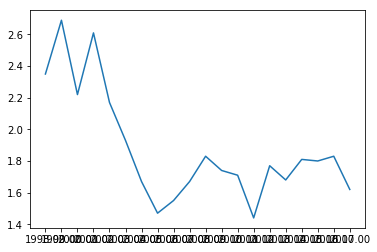

In [44]:
plt.plot(X,Y)

## Chart-14

### Chart#14 - In states with more guns, more police officers are also killed on duty

Police officers are more likely to be killed in homicides in states with more guns. 

Data comes from https://www.odmp.org/search/browse and https://www.atf.gov/file/130436/download.


- Data Access :Yes. 
https://www.odmp.org/search/browse
https://www.atf.gov/file/130436/download

- Up to Date :Yes, data is available from 2010-2017 for gun ownership and for office fatality 1808-2019. 
- Quality : Medium
- Data Source: The data is downloaded from https://www.odmp.org/search/browse
https://www.atf.gov/file/130436/download


** Steps followed to collect the data: *

     1. Scrap information from PDF files by year for gun ownership
     2. There is no data set for officer fatality. However, there is vizualizations and documents that summarize fatalities
     3. I had to create a manual excel file of officers gun fire fatality by state.
     4. Remaining manipulation in Python

In [45]:
import pandas as pd 
import numpy as np

In [46]:
# Read gun ownership by state from GIT
Ownership=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/licensed_ownership_bystate.csv')

In [47]:
# Drop unwanted columns 
Ownership.drop(['Unnamed: 0','weapons','machinegun','short_barreled_rifle','short_barreled_gun','silencer'],axis=1,inplace=True)

In [48]:
# group by and to new frame
gunownership = Ownership.groupby('state')['Total'].sum().to_frame()

In [49]:
# We have the total gun ownership by states
gunownership.head()

,Total
state,
Alabama,328580
Alaska,55951
Arizona,380042
Arkansas,147102
California,439126


In [50]:
# average number of gun ownership
mean = gunownership.Total.mean()
mean

225238.71153846153

In [56]:
# Group of states with high gunownership
High_states = gunownership[gunownership.Total > mean]
High_states.head()

,Total
state,
Alabama,328580
Arizona,380042
California,439126
Connecticut,282750
Florida,773611


In [57]:
## Group of states with low gunownership
Low_states = gunownership[gunownership.Total < mean]
Low_states.head()

,Total
state,
Alaska,55951
Arkansas,147102
Colorado,199368
Delaware,11338
District_of_Columbia,46349


File 2

In [53]:
# Read gun fire officer fatalities by state from GIT
statefatalities=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/stateofficersdeath.csv')

In [54]:
# drom unwated columns
statefatalities.drop(columns=['id'], inplace = True )

In [55]:
# Rename the columns 
cols=['State','abbr','gunfire_deaths']
statefatalities.columns=cols
statefatalities.head()

,State,abbr,gunfire_deaths
0,Alabama,AL,314.0
1,Alaska,AK,33.0
2,Arizona,AZ,141.0
3,Arkansas,AR,183.0
4,California,CA,747.0


We now have 2 groups, one with low gun ownership and the other with high. We also have gunfire fatalities of police officers by state. These information would allow us to reproduce visualization 14.

## Chart-15

## Chart 17

For __Chart 17__, the data can be obtained from Pew Research (you'll need to create an account to gain access to their excellent database of survey data).

For this chart, the data can be downloaded from [this link](https://www.pewsocialtrends.org/2017/06/22/americas-complex-relationship-with-guns/).

Note that it comes zipped with the actual questionnaire and methodology. To load the dataset, you'll need to use pyreadstat to load in the .sav file included in the download. You'll immediately notice that the data is incredibly complex and measures about 130 different variables, as do most well constructed surveys do.

Because of the complexity and requirement to understand the research methodology in order to replicate the charts, we won't attempt this feat for now.

(Even Vox didn't recreate the charts; they simply published the ones made by Pew Research onto their website!)

Here's the data anyway:

In [ ]:
import pyreadstat

w28, meta = pyreadstat.read_sav('https://raw.githubusercontent.com/srivasud/Group7/master/data/ATP W28.sav')

And proof that the dataset is complex:

In [ ]:
shape(w28)

In [ ]:
w28[:10]

In [ ]:
w28.columns.unique()